#### Importing Computer Vision Libraries

In [383]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

import time


In [384]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

#### Preparing the data

In [385]:
#training data

train_data = datasets.FashionMNIST(root='data', train= True, transform= ToTensor(), download= True)
test_data = datasets.FashionMNIST(root='data', train= False, transform= ToTensor(), download= True)

In [386]:
print(f" the length of training data is {len(train_data)}, length of test data  { len(test_data)}")

 the length of training data is 60000, length of test data  10000


In [387]:
#visualize any image randomly
img, label = train_data[2]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0863, 0.4627, 0.0941, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1882, 0.3451, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0471, 0.3922, 0.8314, 0.8039, 0.7255, 0.7020, 0.6784, 0.7294,
           0.7569, 0.8667, 0.5569, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.3333, 0.2980, 0.7804, 0.8824, 0.9725, 1.0000, 0.9333,
           0.8863, 0.6157, 0.2667, 0.3137, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.3569, 0.2706, 0.3569, 0.7882, 0.8549, 0.8824, 0.8196,
           0.6196, 0.2392, 0.3647, 0.2824, 

In [388]:
classnames = train_data.classes
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

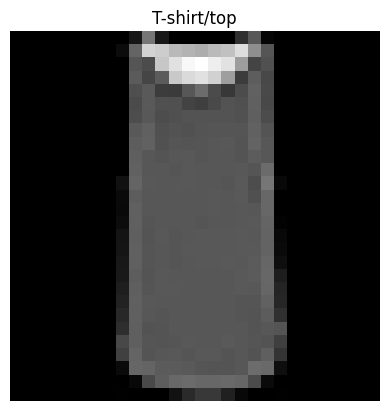

In [389]:
#visualize the image

plt.imshow(img.squeeze(), cmap="gray")
plt.title(classnames[label])
plt.axis(False)



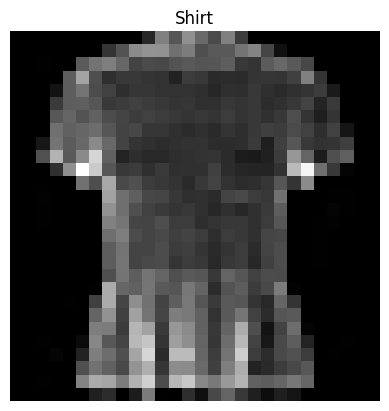

In [390]:
#multiple random images
torch.manual_seed(42)
fig  = plt.Figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols +1):
    #pick image randomly
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap = 'gray')
    plt.axis(False)
    plt.title(classnames[label])

In [391]:
#dataloader to loop through the dataset

#hyperparameter
BATCH_SIZE = 32

train_data_batch = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle= True )

test_data_batch = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle= False)

print(f" The reduced training databatch is {len(train_data_batch)}")
print(f" The reduced test databatch is {len(test_data_batch)}")

 The reduced training databatch is 1875
 The reduced test databatch is 313


In [392]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_batch))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### Creating a baseline model

In [393]:
class FashionMNISTVO(nn.Module):
    def __init__(self, input_shape: int, hidden_layers: int,  output_shape: int):
        super().__init__()

        self.linear_stack = nn.Sequential( nn.Flatten(),
                                          nn.Linear(in_features= input_shape, out_features= hidden_layers),
                                          nn.Linear(in_features= hidden_layers, out_features= output_shape),
                                          )
        

    #define the forward method
    def forward(self, x):
        return self.linear_stack(x)

In [394]:
#create a model for the class

model_0 = FashionMNISTVO(input_shape= 784,
                         hidden_layers= 10,
                         output_shape=len(classnames)).to('cpu')

model_0

FashionMNISTVO(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### Setup loss, optimizer and evaluation metrics

In [395]:
#loss function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

In [396]:
#import helper functions

import requests
from pathlib import Path

r = requests.get(url='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

if Path("helper_functions.py").is_file():
    print(" Skipping the download the file already exists")
else:
    print('Downloading file...........')

    with open('helper_functions.py', 'wb') as f:

        f.write(r.content)

 Skipping the download the file already exists


In [397]:
#time function

def my_run_time(start_time, end_time):

    return f" the elapsed time is { end_time - start_time} seconds"
    

In [398]:
from tqdm.auto import tqdm

#set the manual seed
torch.manual_seed(42)
#set the timer
start_time = time.time()

#set the epochs
epochs = 3

for epoch in tqdm(range(epochs)):

    print(f" this is epoch number {epoch}")

    train_loss = 0

    for batch, (X,y) in enumerate(train_data_batch):

        #train model
        model_0.train()

        #do the forward pass
        y_train_pred = model_0(X)

        #calculate the loss
        loss = loss_fn(y_train_pred, y)
        train_loss += loss

        #zero gradient

        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #optimze step
        optimizer.step()

        if batch % 500 == 0:
            print(f"the batches checked are {batch * len(X)}")

        train_loss /= len(train_data_batch)

        #testing

        test_loss, acc = 0, 0

    model_0.eval()

    with torch.inference_mode():

            #do forward pass

        for batch, (X,y) in enumerate(test_data_batch):
                #do the forward pass
            y_test = model_0(X)

                #calculate the loss
            t_loss = loss_fn(y_test, y)
            test_loss += t_loss

        test_loss /= len(test_data_batch)

    print(f" the training loss is {train_loss:.6f}        <||||     test loss {test_loss:.6f}")

end_time = time.time()


print(my_run_time(start_time, end_time))

  0%|          | 0/3 [00:00<?, ?it/s]

 this is epoch number 0
the batches checked are 0
the batches checked are 16000
the batches checked are 32000
the batches checked are 48000


 33%|███▎      | 1/3 [00:07<00:15,  7.62s/it]

 the training loss is 0.000230        <||||     test loss 0.508077
 this is epoch number 1
the batches checked are 0
the batches checked are 16000
the batches checked are 32000
the batches checked are 48000


 67%|██████▋   | 2/3 [00:15<00:07,  7.90s/it]

 the training loss is 0.000315        <||||     test loss 0.481833
 this is epoch number 2
the batches checked are 0
the batches checked are 16000
the batches checked are 32000
the batches checked are 48000


100%|██████████| 3/3 [00:25<00:00,  8.48s/it]

 the training loss is 0.000161        <||||     test loss 0.478955
 the elapsed time is 25.4294273853302 seconds


#### Adding Non-Linearity to our Model


In [399]:
class FashionMNISTV1(nn.Module):

    def __init__(self, input_shape: int, hidden_layers : int, output_shape: int ):
        super().__init__()

        self.linear_stacktwo = nn.Sequential( nn.Flatten(),
                                             nn.Linear(in_features= input_shape, out_features= hidden_layers),
                                             nn.ReLU(),
                                             nn.Linear(in_features=hidden_layers, out_features= output_shape),
                                             nn.ReLU())
        

    def forward(self, x: torch.Tensor):
        return self.linear_stacktwo(x)
        

In [400]:
#instantiate the class

model_1 = FashionMNISTV1(input_shape=784,
                         hidden_layers= 10,
                         output_shape=len(classnames)).to(device='cpu')

model_1

FashionMNISTV1(
  (linear_stacktwo): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

#### Loss function and Accuracy metrics

In [401]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)



#### functionalizing the testing and training loop

In [402]:
def training_step(model: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  loss: torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  accuracy_fn,
                  device: torch.device = device):
    

    model.to(device)

    train_acc, train_loss = 0, 0

    for batch, (X,y) in enumerate(dataloader):

        model.train()

        #do the forward pass

        y_pred = model(X)

        #calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss = loss

        #accuracy function
        train_acc = accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim=1))

        #optimizer

        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #optimizer step
        optimizer.step()

        if batch % 440 == 0:

            print(f"the train loss is {train_loss:.5f}     || ")
            print(f"the train accuracy is {train_acc:.5f}     || ")

    
    

In [403]:
def test_step(model: torch.nn.Module,
                  accuracy_fn,
                  loss_fn: torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  device: torch.device = device):
    model.to(device)

    model.eval()
    test_loss = 0
    train_acc = 0


    #loop through the dataset data

    with torch.inference_mode():

        for batch, (X,y) in enumerate(dataloader):

            #forwward pass

            y_test = model(X)

            #calculate the loss

            loss = loss_fn(y_test, y)
            test_loss = loss

            train_acc = accuracy_fn(y_true= y, y_pred=y_test.argmax(dim=1)) 

            if batch % 440 == 0:
                print(f"the test loss is {test_loss:.5f}     || ")
                print(f" test accuracy is {train_acc}")

           


In [405]:
#run a loop through all the data 

start_time = time.time()

epochs = 3

for epoch in tqdm(range(epochs)):

    #training data
    training_step(model=model_1,
                  optimizer= optimizer,
                  accuracy_fn= accuracy_fn,
                  loss = loss_fn,
                  dataloader=train_data_batch,
                  device= 'cpu' )
    
    test_step(model= model_1,
              loss_fn= loss_fn,
              accuracy_fn=accuracy_fn,
              dataloader= test_data_batch,
              device= 'cpu')


end_time = time.time()

print(my_run_time(start_time, end_time))

  0%|          | 0/3 [00:00<?, ?it/s]

the train loss is 2.31190     || 
the train accuracy is 9.37500     || 
the train loss is 1.32879     || 
the train accuracy is 50.00000     || 
the train loss is 1.24919     || 
the train accuracy is 53.12500     || 
the train loss is 1.45807     || 
the train accuracy is 46.87500     || 
the train loss is 1.56323     || 
the train accuracy is 46.87500     || 
the test loss is 1.42059     || 
 test accuracy is 53.125


 33%|███▎      | 1/3 [00:08<00:16,  8.04s/it]

the train loss is 0.82976     || 
the train accuracy is 68.75000     || 
the train loss is 1.15848     || 
the train accuracy is 53.12500     || 
the train loss is 1.13823     || 
the train accuracy is 56.25000     || 
the train loss is 0.60679     || 
the train accuracy is 78.12500     || 
the train loss is 1.25864     || 
the train accuracy is 50.00000     || 
the test loss is 1.23008     || 
 test accuracy is 59.375


 67%|██████▋   | 2/3 [00:17<00:08,  8.60s/it]

the train loss is 1.29489     || 
the train accuracy is 53.12500     || 
the train loss is 0.88828     || 
the train accuracy is 65.62500     || 
the train loss is 1.00067     || 
the train accuracy is 62.50000     || 
the train loss is 1.18874     || 
the train accuracy is 53.12500     || 
the train loss is 1.38647     || 
the train accuracy is 50.00000     || 
the test loss is 1.18750     || 
 test accuracy is 62.5


100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

 the elapsed time is 27.246061325073242 seconds


### Convolutional Neural Network

In [406]:
class FashionMNISTV2(nn.Module):
    #class constructor
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d( in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride = 2))
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d( in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2, stride = 2)            

        )

        dummy_input = torch.zeros((1, input_shape, 28, 28))
        dummy_output = self.conv_block_2(self.conv_block_1(dummy_input))
        input_size = dummy_output.flatten(1).shape[1]

       
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_size, out_features= output_shape, )
        )

    def forward(self, x: torch.Tensor):

        x = self.conv_block_1(x)

        x = self.conv_block_2(x)

        x = x.flatten(1)

       

        x = self.classifier(x)

        return x

In [407]:
## create an instance of a class

model_2 = FashionMNISTV2( input_shape=1,
                         hidden_units= 10,
                         output_shape= len(classnames))

model_2

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [408]:
#pass random image through the model

rand_out = model_2(img.unsqueeze(1))
rand_out

tensor([[ 0.0164,  0.0423,  0.0199,  0.0422, -0.0517,  0.0184,  0.0162, -0.0477,
         -0.0194, -0.0485]], grad_fn=<AddmmBackward0>)

##### Loss function and Optimizer

In [409]:
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.01 )


model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.1099,  0.0048, -0.1266],
                        [-0.0932, -0.0460, -0.0676],
                        [-0.2062,  0.2509,  0.0675]]],
              
              
                      [[[-0.2230, -0.0677, -0.2412],
                        [-0.1948,  0.2532,  0.1018],
                        [ 0.1460, -0.0432, -0.0832]]],
              
              
                      [[[ 0.0431, -0.2368, -0.3317],
                        [ 0.2343,  0.0068,  0.2022],
                        [ 0.2508,  0.1458, -0.1139]]],
              
              
                      [[[-0.0611, -0.0174,  0.0199],
                        [ 0.0130, -0.2606, -0.1832],
                        [ 0.2429,  0.0107, -0.1511]]],
              
              
                      [[[ 0.2254, -0.0989, -0.1356],
                        [ 0.2330, -0.2630, -0.1596],
                        [ 0.2523, -0.0326, -0.1375]]],
              
              
      

In [410]:
## run the training and test loop

epochs = 3


start_time = time.time()

for epoch in tqdm(range(epochs)):

    print(f" this is the {epoch} number")

    training_step( model= model_2,
                  optimizer= optimizer,
                  loss = loss_fn,
                  accuracy_fn = accuracy_fn,
                  dataloader= train_data_batch,
                  device= 'cpu')
    

    test_step( model= model_2,
              loss_fn= loss_fn,
              accuracy_fn= accuracy_fn,
              dataloader= test_data_batch,
              device= 'cpu')
    
end_time = time.time()

print(my_run_time(start_time = start_time, end_time= end_time))

  0%|          | 0/3 [00:00<?, ?it/s]

 this is the 0 number
the train loss is 2.30866     || 
the train accuracy is 9.37500     || 
the train loss is 2.30258     || 
the train accuracy is 9.37500     || 
the train loss is 2.02019     || 
the train accuracy is 28.12500     || 
the train loss is 0.71729     || 
the train accuracy is 81.25000     || 
the train loss is 0.72450     || 
the train accuracy is 78.12500     || 
the test loss is 0.69186     || 
 test accuracy is 71.875


 33%|███▎      | 1/3 [00:35<01:10, 35.34s/it]

 this is the 1 number
the train loss is 0.89494     || 
the train accuracy is 68.75000     || 
the train loss is 0.57345     || 
the train accuracy is 78.12500     || 
the train loss is 0.46073     || 
the train accuracy is 81.25000     || 
the train loss is 0.47695     || 
the train accuracy is 81.25000     || 
the train loss is 0.33488     || 
the train accuracy is 90.62500     || 
the test loss is 0.56839     || 
 test accuracy is 71.875


 67%|██████▋   | 2/3 [01:34<00:49, 49.08s/it]

 this is the 2 number
the train loss is 0.42094     || 
the train accuracy is 90.62500     || 
the train loss is 0.26523     || 
the train accuracy is 90.62500     || 
the train loss is 0.52114     || 
the train accuracy is 84.37500     || 
the train loss is 0.23103     || 
the train accuracy is 93.75000     || 
the train loss is 0.34670     || 
the train accuracy is 84.37500     || 
the test loss is 0.70320     || 
 test accuracy is 75.0


100%|██████████| 3/3 [02:31<00:00, 50.47s/it]

 the elapsed time is 151.40154361724854 seconds


In [411]:
## Evaluation model

torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data,
               accuracy_fn,
               loss_fn: nn.Module,
               device: torch.device = device):
    
    acc, loss = 0, 0

    model.eval()

    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            # define forward pass
            y_test = model(X)

            #loss fn and accuracy function
            loss += loss_fn(y_test, y)

            acc += accuracy_fn(y_true= y, y_pred= y_test.argmax(dim=1))

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [412]:
#making predictions based on the 

def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device,
                     ):
    
    pred_probs = []

    model.eval()

    with torch.inference_mode():

        for sample in data:

            #make a forward pass

            y_preds = model(sample)

            #turn the predictions to probabilities

            pred_prob = torch.softmax(y_preds.squeeze(), dim=0)

            #append to list

            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [419]:
import random

random.seed(42)

#prepare data
test_sample = []
test_label = []

for sample, label in random.sample(list(test_data), k = 9):
    test_sample.append(sample.unsqueeze(1))
    test_label.append(label)

In [423]:
#make preduictions using our prediction function

predi_probs = make_predictions(model_2, data= test_sample, device= 'cpu')

#convert to prediction probs

prediction_probs = predi_probs.argmax(dim=1)

prediction_probs, test_label

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])